In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from scipy.stats import chi2_contingency

import sys
import os

import math

# Ajouter le chemin du dossier parent à sys.path
notebook_dir = os.path.abspath('..')  # Dossier parent de "notebook/"
sys.path.append(notebook_dir)

# Importer toutes les fonctions du module
from fonctions.importation import *

import warnings
warnings.filterwarnings("ignore")

c:\Users\theol\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = etl(r"C:\Users\theol\Desktop\Projet_MLOPS\data")
df

**************************************************
Démarrage du processus d'importation

Importation du fichier LondonHousePrice_1995.csv
Importation du fichier LondonHousePrice_1996.csv
Importation du fichier LondonHousePrice_1997.csv
Importation du fichier LondonHousePrice_1998.csv
Importation du fichier LondonHousePrice_1999.csv
Importation du fichier LondonHousePrice_2000.csv
Importation du fichier LondonHousePrice_2001.csv
Importation du fichier LondonHousePrice_2002.csv
Importation du fichier LondonHousePrice_2003.csv
Importation du fichier LondonHousePrice_2004.csv
Importation du fichier LondonHousePrice_2005.csv
Importation du fichier LondonHousePrice_2006.csv
Importation du fichier LondonHousePrice_2007.csv
Importation du fichier LondonHousePrice_2008.csv
Importation du fichier LondonHousePrice_2009.csv
Importation du fichier LondonHousePrice_2010.csv
Importation du fichier LondonHousePrice_2011.csv
Importation du fichier LondonHousePrice_2012.csv
Importation du fichier London

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,England,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,...,684000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,4.494382,2023-10-31,1995-09-21,83500,NaN,NaN
1,"20 Princelet Street, London, E1 6QH",E1 6QH,England,E1,51.519679,-0.072449,4.0,4.0,157.0,NaN,...,3407000.0,HIGH,2024-10-07T13:26:59.894Z,145000.0,4.677419,2024-06-10,1995-08-24,135000,NaN,NaN
2,"34 Hanbury Street, London, E1 6QR",E1 6QR,England,E1,51.520198,-0.072327,3.0,4.0,212.0,2.0,...,3962000.0,MEDIUM,2024-10-07T13:26:59.894Z,1002000.0,38.538462,2017-08-22,1995-07-24,115000,35.294118,30000.0
3,"34 Hanbury Street, London, E1 6QR",E1 6QR,England,E1,51.520198,-0.072327,3.0,4.0,212.0,2.0,...,3962000.0,MEDIUM,2024-10-07T13:26:59.894Z,1002000.0,38.538462,2017-08-22,1995-05-02,85000,63.461538,33000.0
4,"34 Hanbury Street, London, E1 6QR",E1 6QR,England,E1,51.520198,-0.072327,3.0,4.0,212.0,2.0,...,3962000.0,MEDIUM,2024-10-07T13:26:59.894Z,1002000.0,38.538462,2017-08-22,1995-04-04,52000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282867,"Flat 9, 4–10 Tower Street, London, WC2H 9NP",WC2H 9NP,England,WC2H,51.513287,-0.128077,NaN,NaN,106.0,NaN,...,1771000.0,LOW,2024-10-07T13:26:59.894Z,-44000.0,-2.894737,2024-01-31,2024-01-31,1520000,8.571429,120000.0
282868,"Flat 3, 25 Shelton Street, London, WC2H 9HW",WC2H 9HW,England,WC2H,51.513553,-0.126193,2.0,2.0,70.0,NaN,...,898000.0,HIGH,2024-10-07T13:26:59.894Z,41000.0,5.030675,2024-05-15,2024-05-15,815000,91.764706,390000.0
282869,"Flat 7, Kipling House, 43 Villiers Street, Lon...",WC2N 6NE,England,WC2N,51.507959,-0.123353,1.0,2.0,74.0,1.0,...,1073000.0,HIGH,2024-10-07T13:26:59.894Z,92000.0,9.892473,2024-03-28,2024-03-28,930000,-19.130435,-220000.0
282870,"Flat 4, 34 Craven Street, London, WC2N 5NP",WC2N 5NP,England,WC2N,51.507513,-0.124683,2.0,2.0,111.0,1.0,...,1469000.0,HIGH,2024-10-07T13:26:59.894Z,49000.0,3.629630,2024-02-16,2024-02-16,1350000,147.706422,805000.0


In [12]:
# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

In [13]:
adapted_numeric_columns = ['bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange', 'history_price',
       'history_percentageChange', 'history_numericChange']

adapted_non_numeric_columns = ['tenure','propertyType', 'currentEnergyRating', 'saleEstimate_confidenceLevel']

In [25]:
def calculate_missing_and_distinct(df):
    """
    Calcule les valeurs manquantes et distinctes pour chaque colonne du DataFrame.
    Retourne deux DataFrames : un pour les valeurs brutes et un pour les pourcentages.
    """
    # Calcul des valeurs manquantes et des valeurs distinctes
    missing_values = df.isnull().sum()  # Nombre de valeurs manquantes
    distinct_values = df.nunique()  # Nombre de valeurs distinctes
    total_rows = len(df)

    # Calcul des pourcentages de valeurs manquantes et distinctes (arrondis à l'unité près)
    missing_percentage = (missing_values / total_rows) * 100
    distinct_percentage = (distinct_values / total_rows) * 100

    # Combiner les résultats dans des DataFrames
    summary_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Distinct Values': distinct_values
    })

    percentage_df = pd.DataFrame({
        'Missing Percentage': missing_percentage.round(0),  # Arrondi à l'unité
        'Distinct Percentage': distinct_percentage.round(0)  # Arrondi à l'unité
    })

    return summary_df, percentage_df

def plot_heatmap(data, title):
    """
    Génère et affiche une heatmap à partir du DataFrame fourni.
    Affiche les valeurs brutes ou en pourcentage selon le type de données.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, annot=True, cmap="coolwarm", fmt="d" if data.equals(summary_df) else ".0f", 
                cbar=False, cbar_kws={'orientation': 'horizontal'})
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.gca().xaxis.set_ticks_position('top')  # Placer les ticks en haut
    plt.gca().yaxis.set_ticks_position('left')  # Conserver les ticks à gauche
    plt.show()

def analyze_and_plot(df):
    """
    Calcule les valeurs manquantes et distinctes, puis affiche les heatmaps correspondantes.
    """
    # Calculer les DataFrames des valeurs brutes et des pourcentages
    summary_df, percentage_df = calculate_missing_and_distinct(df)
    
    # Afficher les heatmaps
    plot_heatmap(summary_df, 'Missing and Distinct Values per Column')
    plot_heatmap(percentage_df, 'Missing and Distinct Percentage per Column')

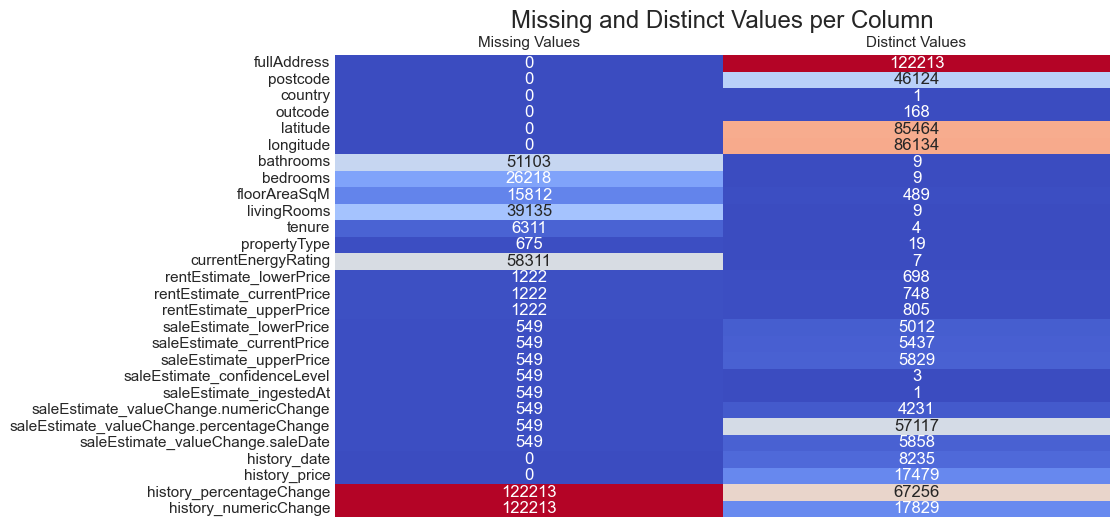

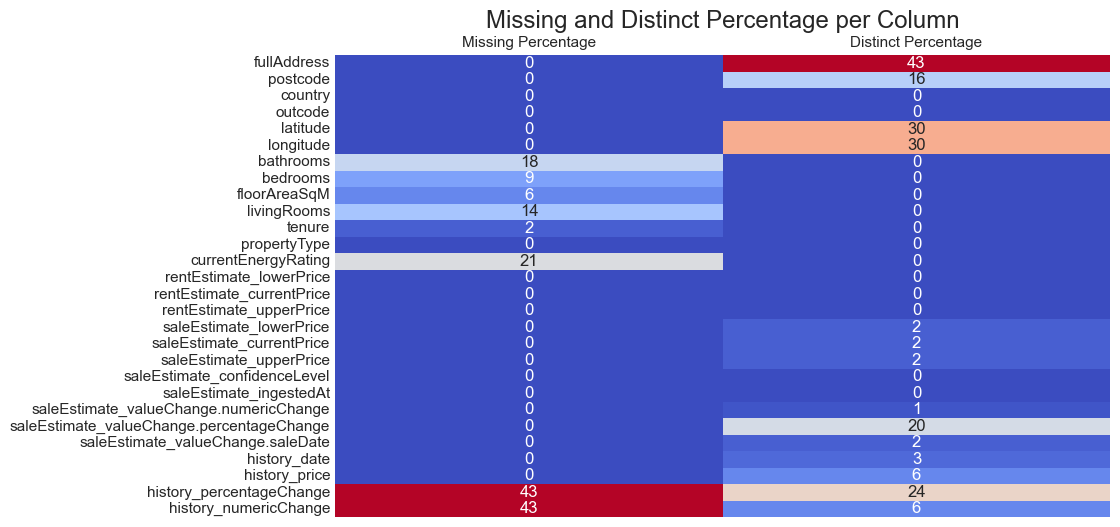

In [26]:
analyze_and_plot(df)

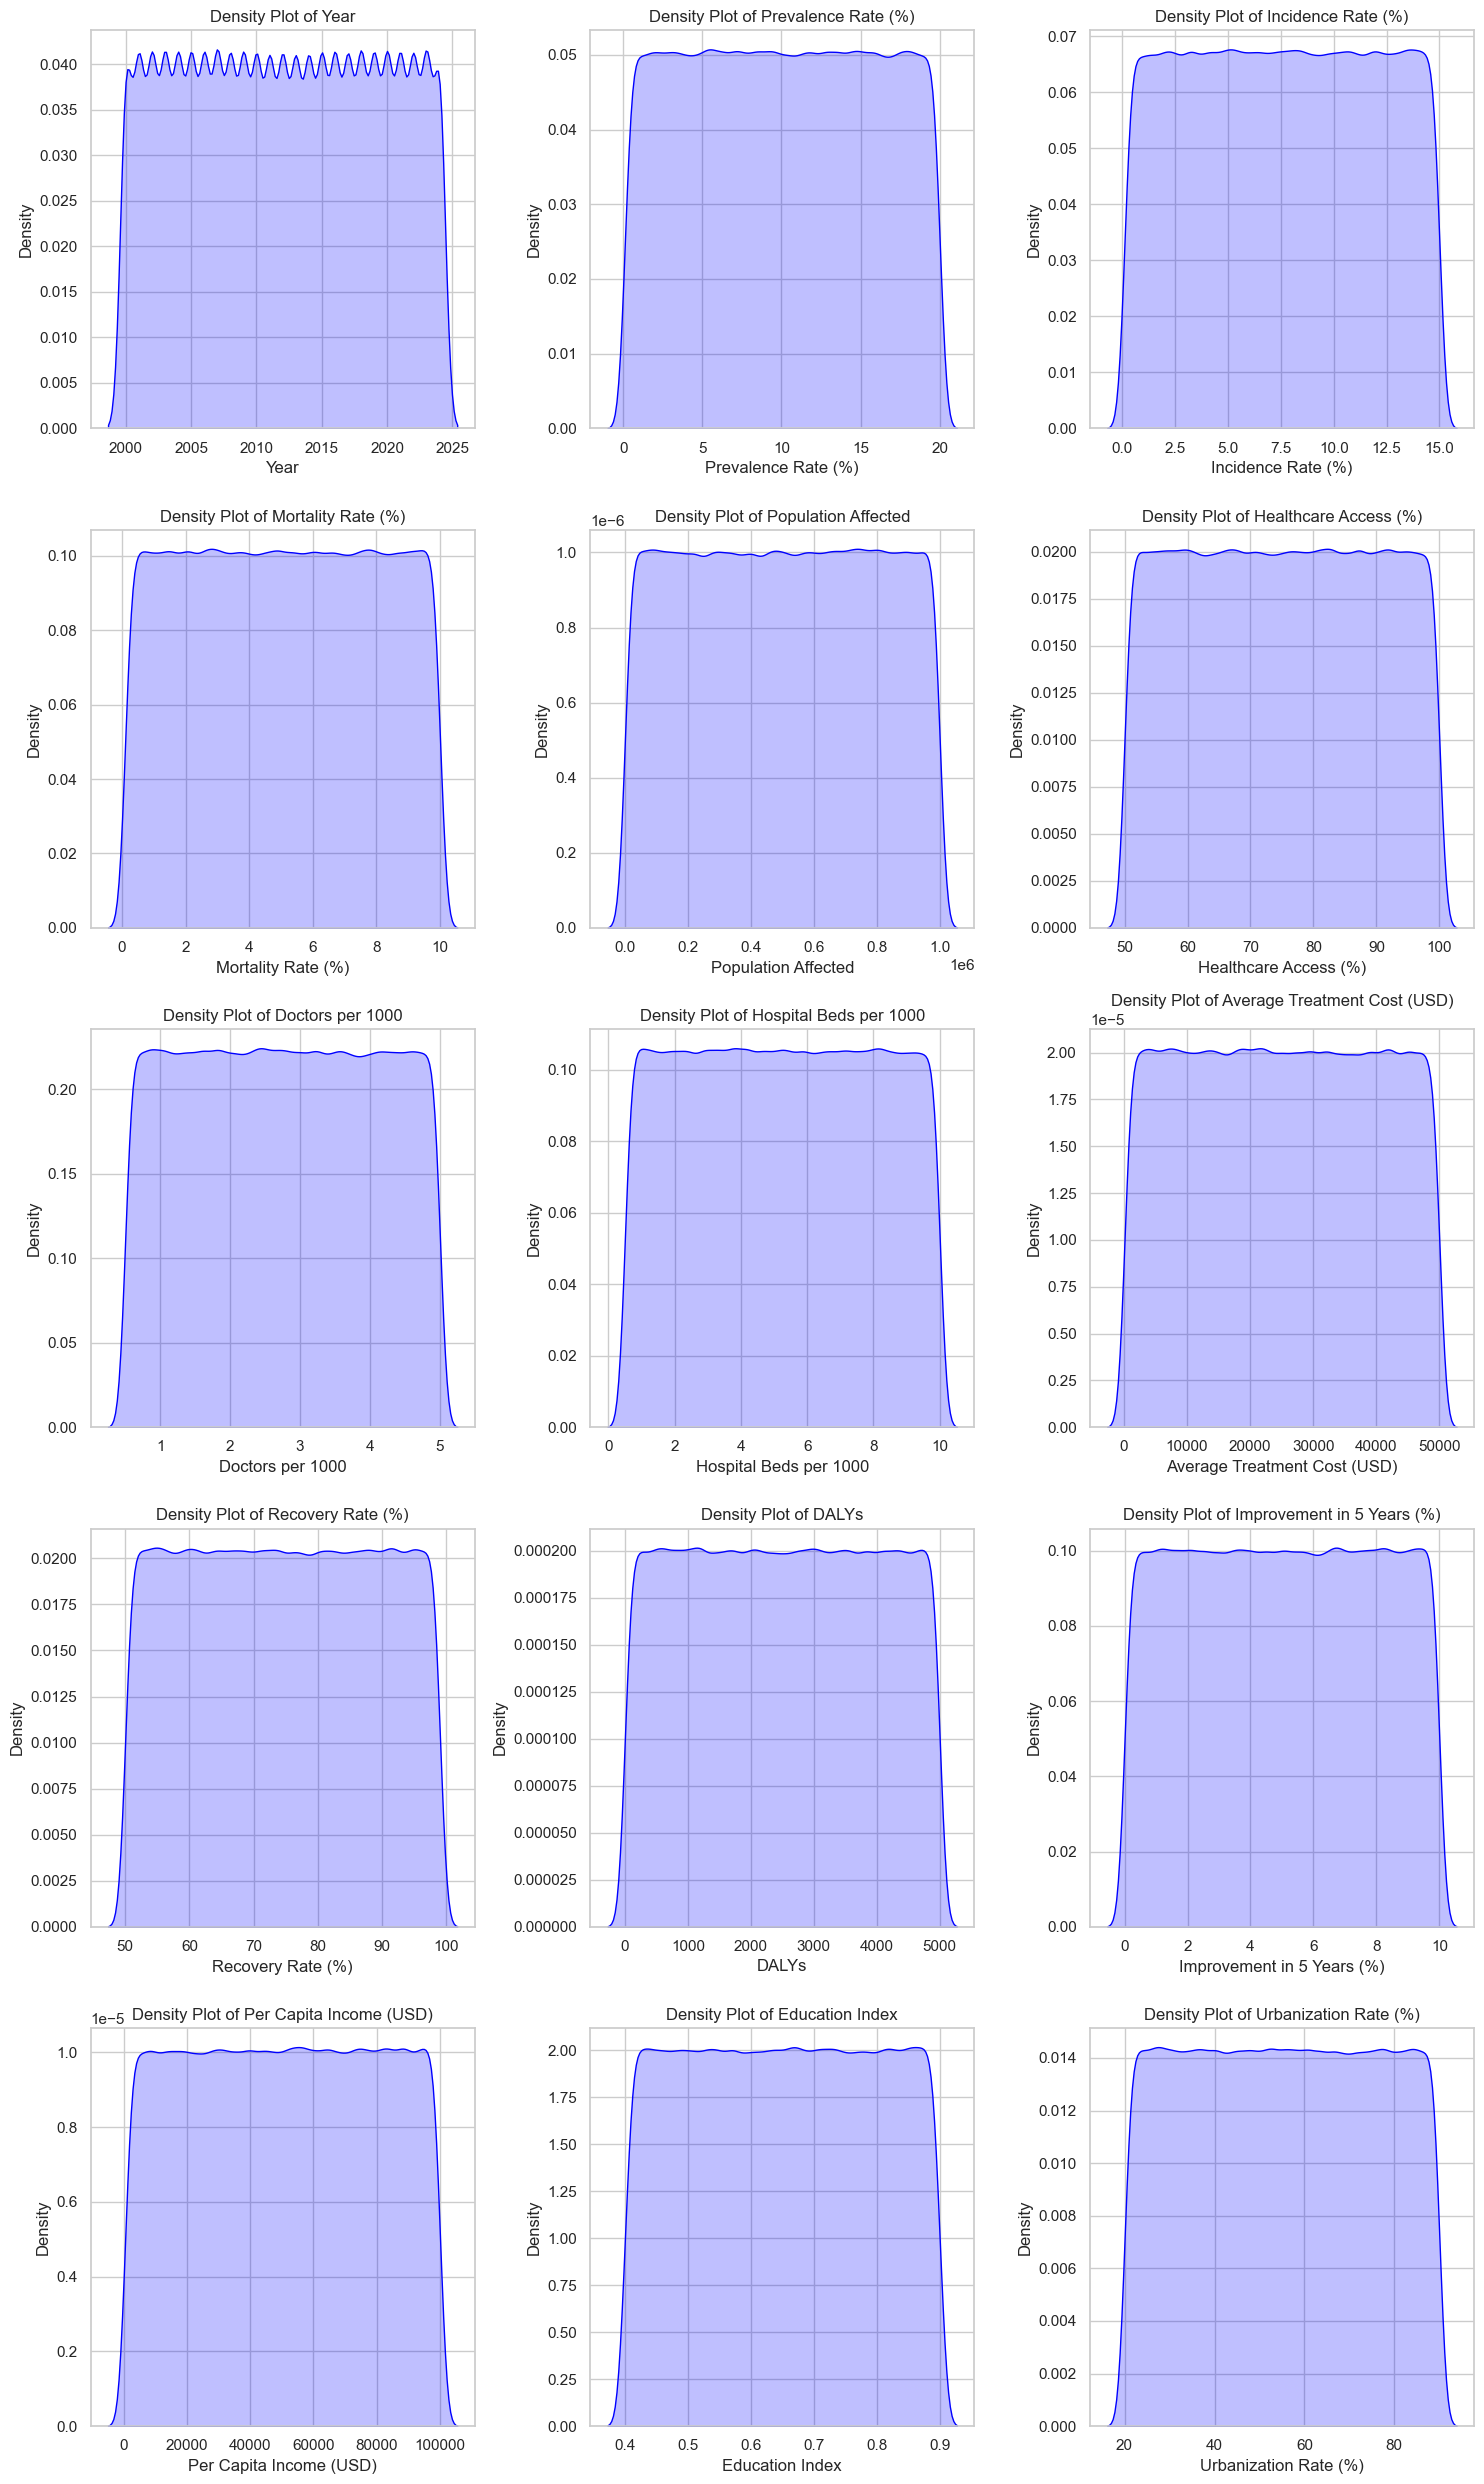

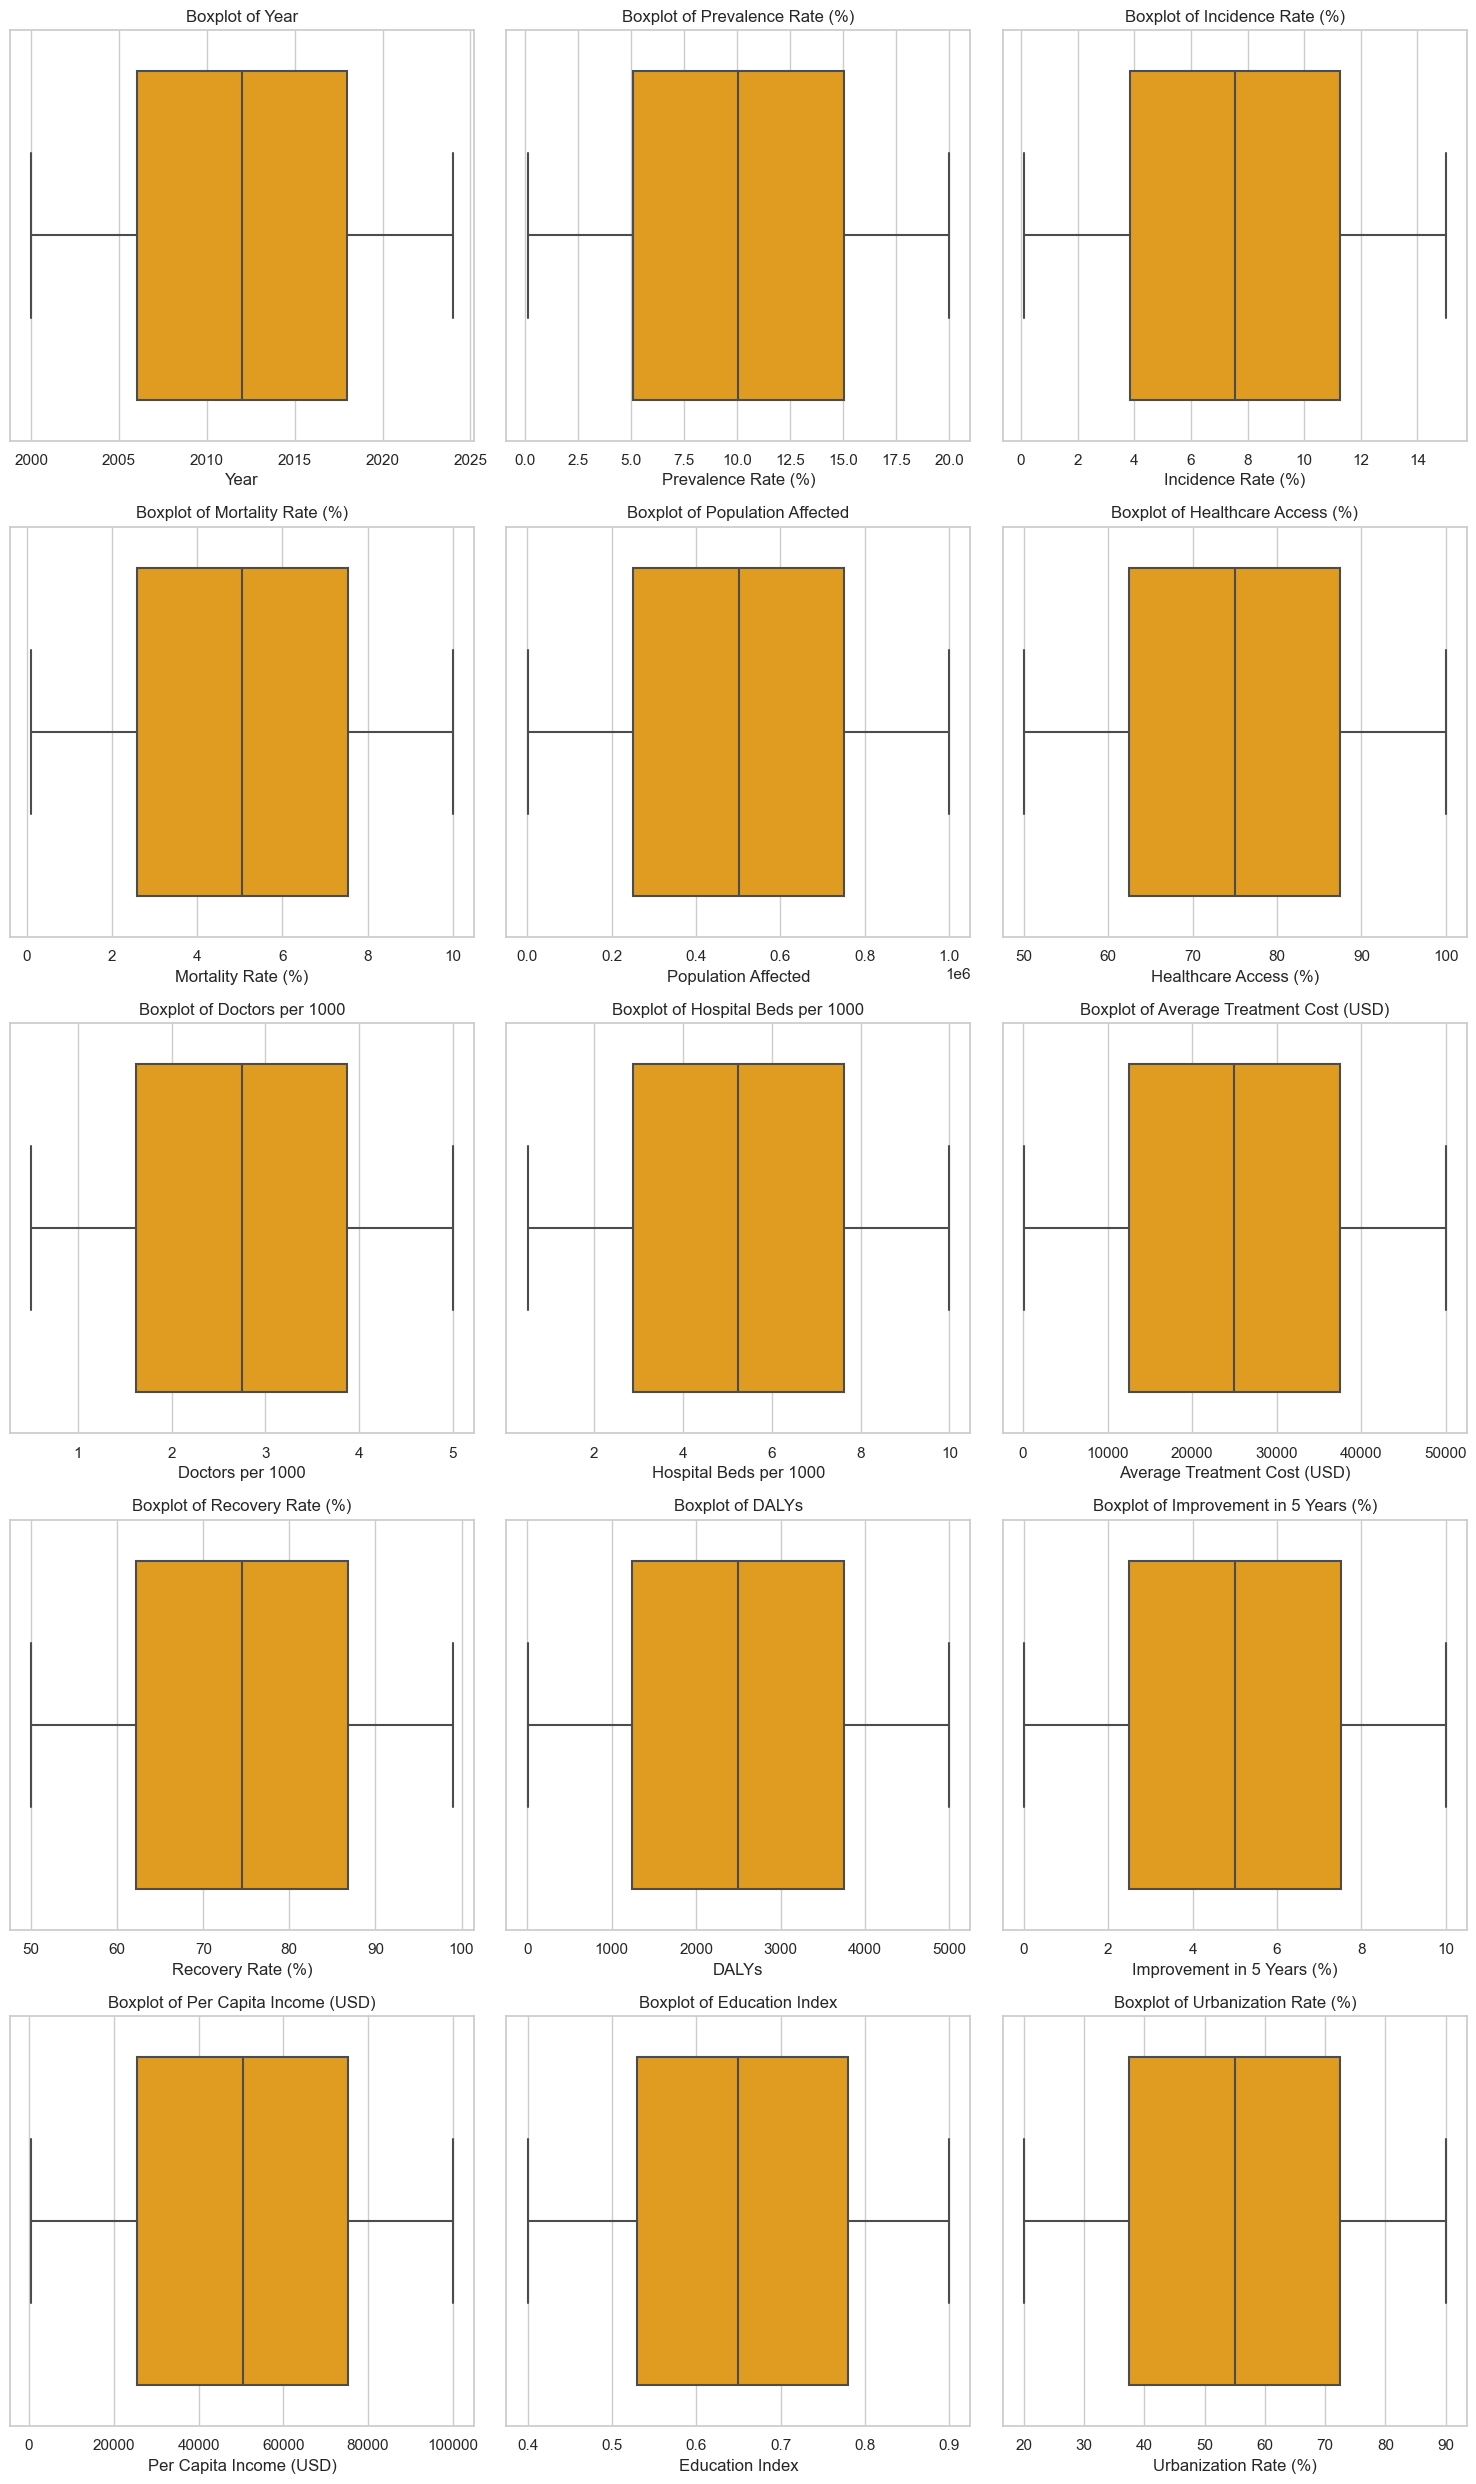

In [ ]:
# Configuration de l'affichage
sns.set(style="whitegrid")
# Calcul du nombre de lignes et de colonnes pour le sous-graphique
num_cols = 3  # Par exemple, on fixe 3 colonnes
num_rows = math.ceil(len(numeric_columns) / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Création de graphiques pour chaque colonne numérique avec courbe de densité
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boîtes à moustaches pour les mêmes colonnes
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


tenure
Leasehold    164927
Freehold     108739
Feudal         2135
Shared          760
Name: count, dtype: int64


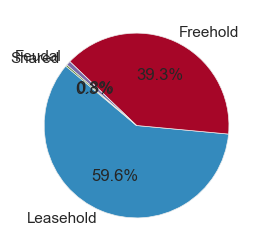

propertyType
Purpose Built Flat        72929
Flat/Maisonette           65023
Mid Terrace House         47881
Converted Flat            34058
Semi-Detached House       21881
Terrace Property          16551
End Terrace House         13924
Detached House             7201
Terraced                   1075
Semi-Detached Property      301
Bungalow Property           292
Semi-Detached Bungalow      255
Detached Bungalow           200
Detached Property           167
End Terrace Property        167
Mid Terrace Property        141
Mid Terrace Bungalow         69
Terraced Bungalow            44
End Terrace Bungalow         38
Name: count, dtype: int64


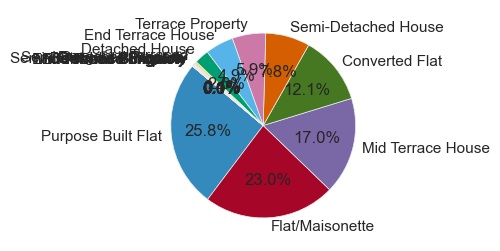

currentEnergyRating
D    93754
C    83952
B    22873
E    21627
F     1646
G      503
A      206
Name: count, dtype: int64


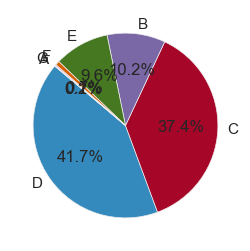

saleEstimate_confidenceLevel
HIGH      204349
MEDIUM     57515
LOW        20459
Name: count, dtype: int64


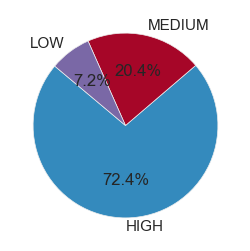

In [11]:
for column in adapted_non_numeric_columns :

    plt.style.use("bmh")
    prop_mod_cah = df[column].value_counts() # Calcul les proportions d'appartitions des modalités dans la variable
    print(prop_mod_cah)
    plt.figure(figsize=(3, 3))
    plt.pie(prop_mod_cah, labels=prop_mod_cah.index, autopct='%1.1f%%', startangle=140)
    plt.show()

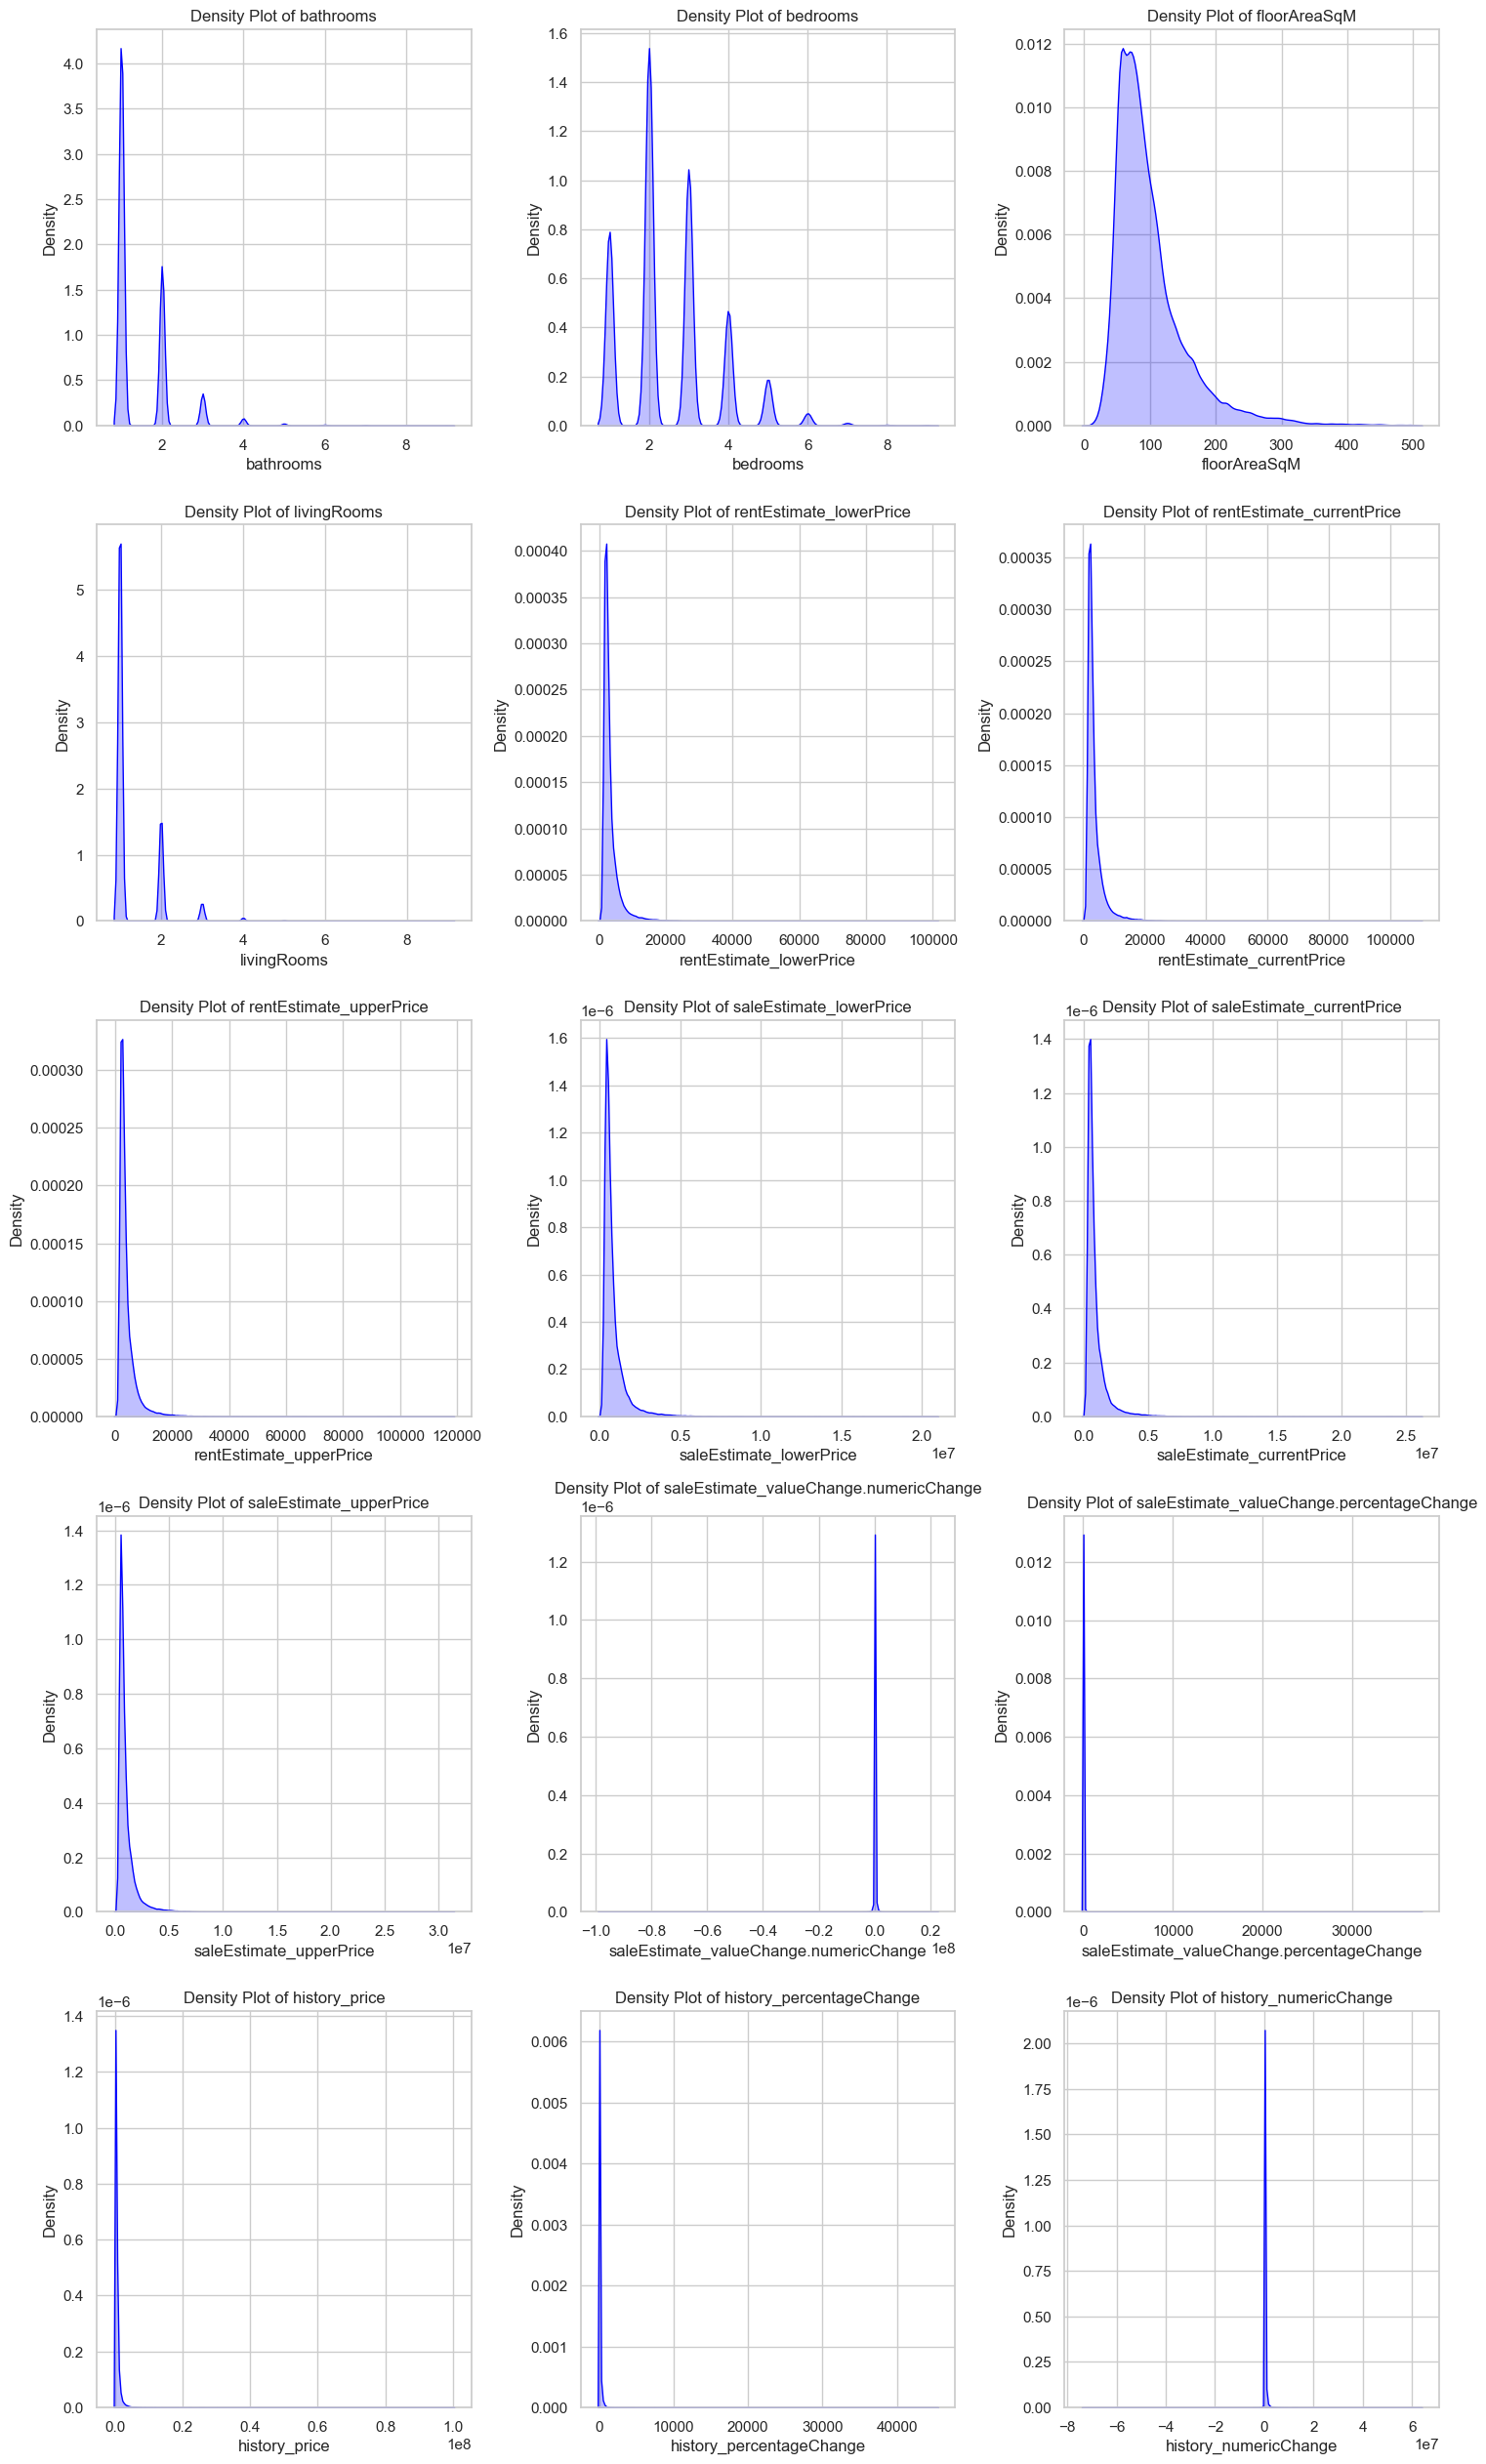

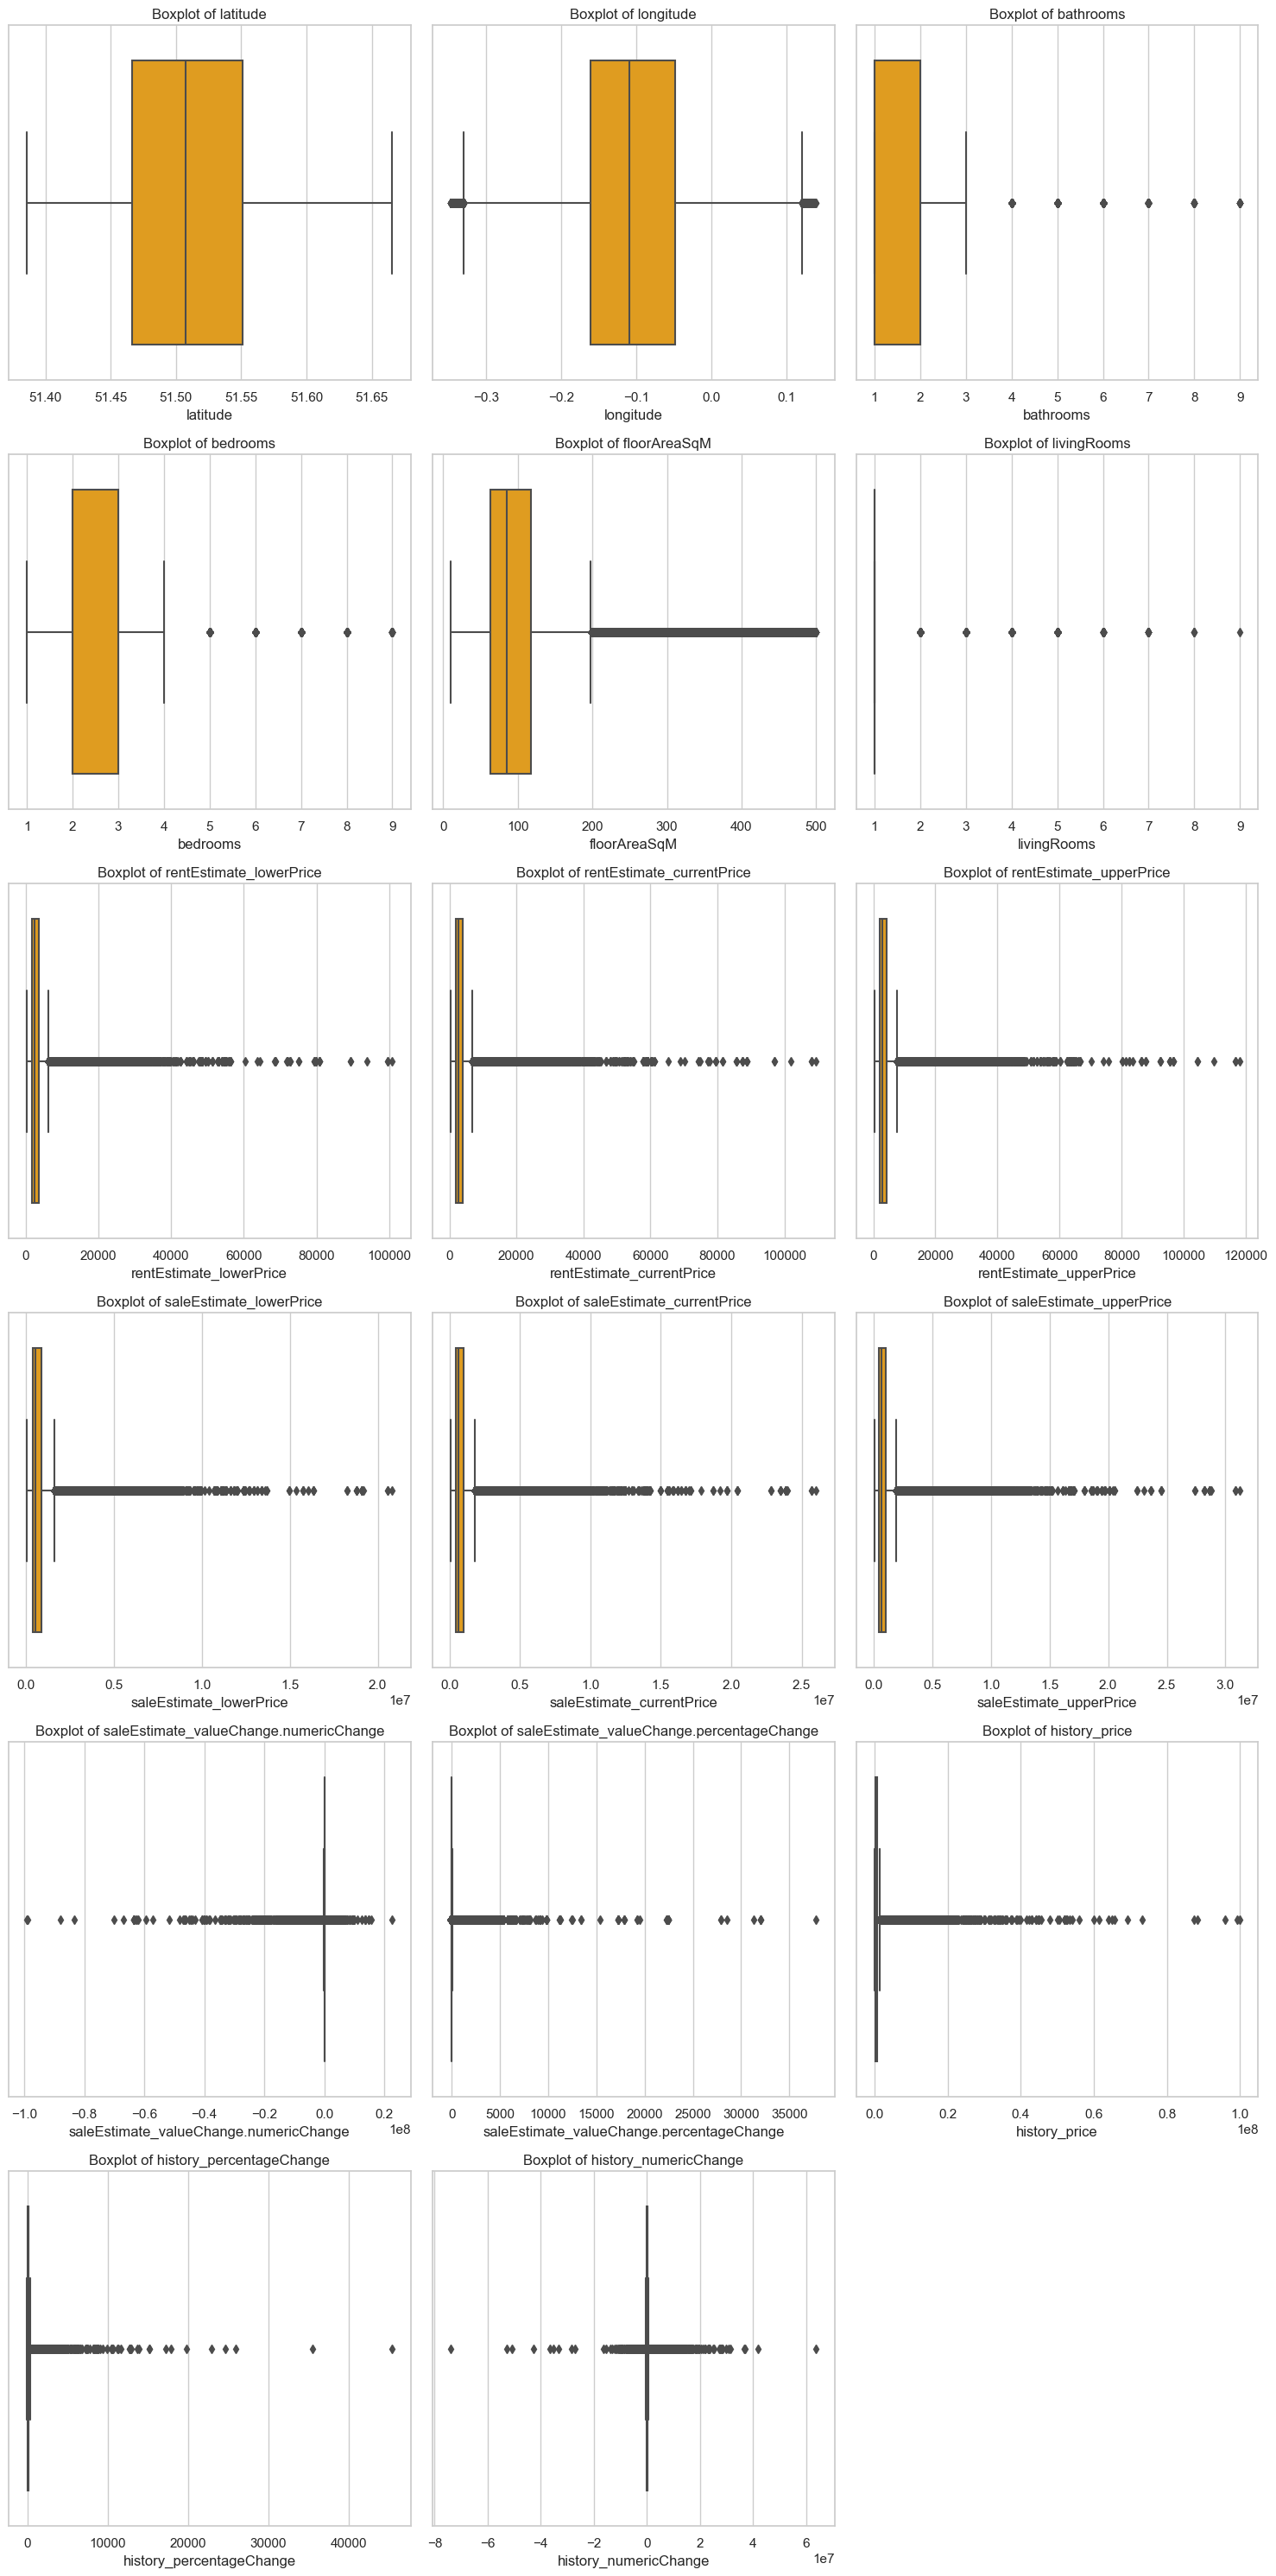

In [6]:
# Configuration de l'affichage
sns.set(style="whitegrid")
# Calcul du nombre de lignes et de colonnes pour le sous-graphique
num_cols = 3  # Par exemple, on fixe 3 colonnes
num_rows = math.ceil(len(numeric_columns) / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Création de graphiques pour chaque colonne numérique avec courbe de densité
for i, column in enumerate(adapted_numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boîtes à moustaches pour les mêmes colonnes
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
